In [19]:
from main import Problem

In [20]:
test = [[2, 4, 6], [8, 10, 12]]
train = [[1, 3, 5], [3, 5, 7]]
args = {"problem": "test_problem"}
name = "Testing Problem class"

Problem = Problem(name, train, test, args)

<Axes: title={'center': 'Testing Problem class'}, xlabel='X-axis', ylabel='Y-axis'>

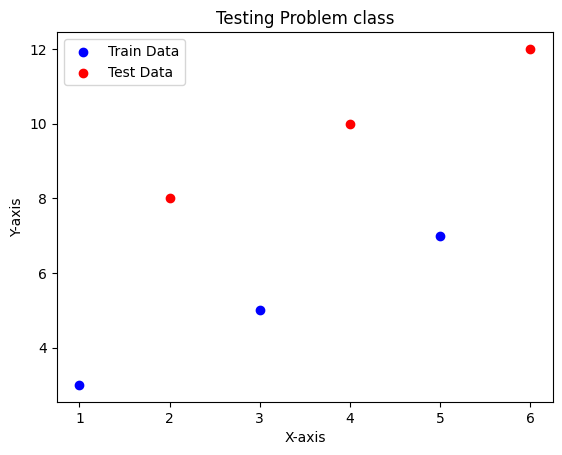

In [21]:
Problem.plot()